# Chi-Square $(\chi^2)$ Test for Qualitative Data

#### We will use the chi-square test for independence to investigate the associations between two categorical variables.

Steps for the Chi-square test 
1. Collect your data, summarize it in a two-way table.
2. set up your null hypothesis $H_0$: Variable are independent; and the alternate hypothesis, $H_1$: Variable are dependent.
3. Calculate the expected cell counts under the assumption of independence.
4. Check the condition of the Chi-square test before proceeding; each expected cell count must be greater than or equal to five.
5. Figure the Chi-square test statistics.
6. Look up your test statistics on the Chi-square table and find the p-value.
7. Follow the decision rule (if $p<\alpha$, reject $H_0$ and conclude you have evidence of dependence. If $p\geq\alpha$, fail to reject $H_0$: we do not have enough evidence that the variables are dependent.)

In [1]:
# importing the necessary libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2
from scipy.stats import chi2_contingency

C:\Users\Alan\AppData\Local\Temp\ipykernel_11556\892470719.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Theoretical Chi-Square distribution with different degrees of freedom

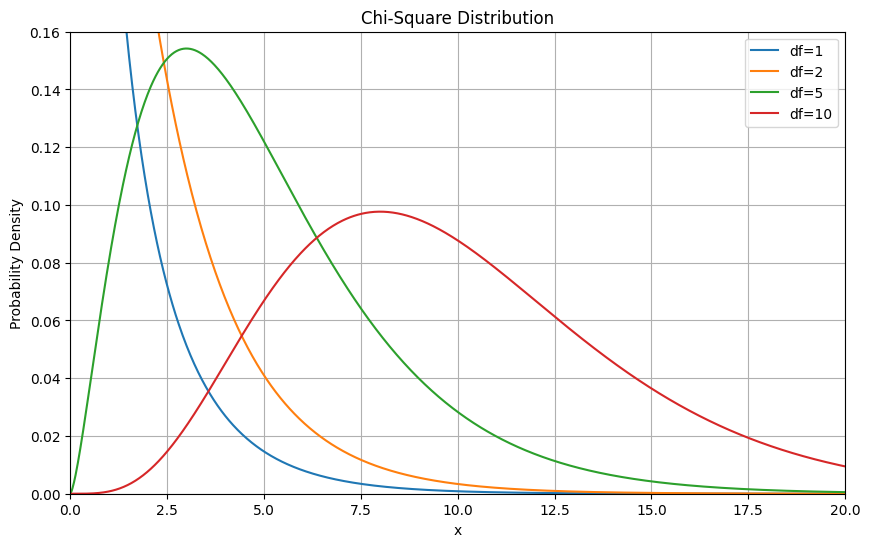

In [2]:
# Define degrees of freedom
degrees_of_freedom = [1, 2, 5, 10]

# Define range for x-axis
x = np.linspace(0, 20, 1000)

# Plot chi-square distribution for each degree of freedom
plt.figure(figsize=(10, 6))
for df in degrees_of_freedom:
    plt.plot(x, chi2.pdf(x, df), label=f'df={df}')

# Set limits for x-axis and y-axis
plt.xlim(0, 20)  # Example x-axis limits
plt.ylim(0, 0.16)  # Example y-axis limits

# Add labels and title
plt.title('Chi-Square Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


### We will use the famous Titanic dataset to explore association between survival status and passenger's class.
### Dataset is from Kaggle.

In [3]:
# Load Titanic dataset
titanic_df = pd.read_csv('titanic_dataset.csv')

# Explore dataset
print(titanic_df.head())

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

### Features

1. survival - Survival (0 = No; 1 = Yes)
2. class - Passenger Class (1 = 1st; 2nd; 3 = 3rd)

![Alt text](Picture1.png)

## Create contingency table(two-way table).

In [4]:
# Create contingency table
contingency_table = pd.crosstab(titanic_df['pclass'], titanic_df['survived'])

# Perform chi-square test for independence
test_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

contingency_table


survived,0.0,1.0
pclass,,
1.0,123,200
2.0,158,119
3.0,528,181


### $H_0$: Survival status and passenger class are independent.
### $H_1$: Survival status and passenger class are dependent.

In [5]:
# Print results
print("Chi-Square Test Statistic:", test_statistic)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Test Statistic: 127.85915643930326
P-value: 1.7208259588256173e-28
Degrees of Freedom: 2
Expected Frequencies:
 [[199.62337662 123.37662338]
 [171.19404125 105.80595875]
 [438.18258212 270.81741788]]


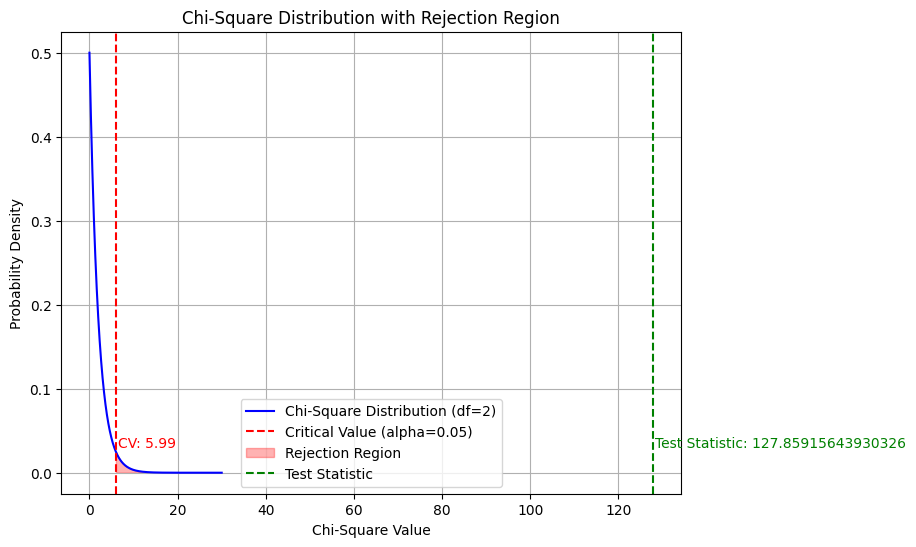

In [6]:
# Generate values for the chi-square distribution
x = np.linspace(0, 30, 1000)

# Calculate the probability density function (PDF) for each value of x
pdf = chi2.pdf(x, dof)

# Plot the chi-square distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, color='blue', label=f'Chi-Square Distribution (df={dof})')
plt.title('Chi-Square Distribution with Rejection Region')
plt.xlabel('Chi-Square Value')
plt.ylabel('Probability Density')
plt.legend()

# Define alpha (significance level)
alpha = 0.05

# Calculate the critical value for the rejection region
critical_value = chi2.ppf(1 - alpha, dof)

# Plot the rejection region
plt.axvline(x=critical_value, color='red', linestyle='--', label=f'Critical Value (alpha={alpha})')
plt.fill_between(x, pdf, where=(x >= critical_value), color='red', alpha=0.3, label='Rejection Region')

# Add annotation for critical value
plt.text(critical_value + 0.5, 0.03, f'CV: {critical_value:.2f}', color='red')


# Plot the test statistic
plt.axvline(x=test_statistic, color='green', linestyle='--', label='Test Statistic')
plt.text(test_statistic + 0.5, 0.03, f'Test Statistic: {test_statistic}', color='green')

# Add legend and show plot
plt.legend()
plt.grid(True)
plt.show()


## Interpreting P-value.

In [7]:
# Significance level (alpha)
alpha = 0.05
print(p_value)
# Compare p-value to significance level
if p_value <= alpha:
    print("The result is statistically significant.")
    print("Reject the null hypothesis.")
    print("There is sufficient evidence to support the alternative hypothesis.")
else:
    print("The result is not statistically significant.")
    print("Do not reject the null hypothesis.")
    print("There is insufficient evidence to support the alternative hypothesis.")


1.7208259588256173e-28
The result is statistically significant.
Reject the null hypothesis.
There is sufficient evidence to support the alternative hypothesis.


#### The $p-value$ obtained from the chi-square test for independence was $1.7208259588256173e-28$. Given this extremely small $p-value$, we reject the null hypothesis at the $0.05$ significance level, providing strong evidence to support the alternative hypothesis that the two-factor variables are dependent.

#### Similar analysis also showed strong association between survival status and sex.